# **SkinSease**

**Selected Theme**: Health Care
Title of the Project:
**"Skin Disease Detection Using Image Recognition"**

**Dataset:** <br>
- https://www.kaggle.com/mdsafayet/multiclass-disease-classification (_ORIGINAL VERSION_)
- https://www.kaggle.com/aurellashilla/skin-disease (_FILTERED TO 6 CLASSES OF SKIN DISEASE_)

**References**:


*   https://www.sehatq.com/artikel/jenis-penyakit-kulit-menular-dan-cara-mengobatinya

*   https://www.healthline.com/health/skin-disorders#:~:text=Examples%20of%20chronic%20skin%20conditions,large%2C%20irregular%20patches%20of%20skin



#**Project Scope & Deliverables**
We aim to use AI to achieve the objective of this project: creating techniques for the
classification of the skin images to predict.

There will be two main activities, the first one is collecting users skin and diseases data,
including their profile and authentication. The second one is skin analysis, which will ask the
permission of users to use the camera, identify what kind of diseases he/she has and give
notifications what skin he/she had. And after the condition is confirmed, the application will give
suggestions about the medicine or ointment they need to take.

Upload kaggle.json file and run the code below.

In [1]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

Done


#Downloading the dataset from Kaggle
This dataset contains 6 classes of skin disease used as follows.
1. Dermatofibroma
2. Melanoma
3. Pigmented Benign Keratosis
4. Seborrheic Keratosis
5. Squamous Cell Carcinoma
6. Vascular Lesion

In [2]:
#Download dataset from kaggle
!kaggle datasets download aurellashilla/skin-disease

#train dataset
!kaggle datasets download aurellashilla/skin-train

#test dataset
!kaggle datasets download aurellashilla/skin-disease-test

#list directory
!ls

 98% 529M/539M [00:04<00:00, 129MB/s]
100% 539M/539M [00:04<00:00, 118MB/s]
 96% 349M/364M [00:03<00:00, 90.7MB/s]
100% 364M/364M [00:03<00:00, 114MB/s] 
 97% 169M/174M [00:01<00:00, 89.3MB/s]
100% 174M/174M [00:01<00:00, 97.1MB/s]
sample_data  skin-disease-test.zip  skin-disease.zip  skin-train.zip


#Import Libraries

In [3]:
# TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# TensorFlow Datsets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper Libraries
import numpy as np
import matplotlib.pyplot as plt
import pathlib

import os
import zipfile
from os import getcwd

assert tf.__version__.startswith('2')


#Data Pre-Processing

In [4]:
local_zip = 'skin-disease-test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = 'skin-train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [5]:
#split training data per class
dermatofib_dir = os.path.join('/tmp/skin_d/dermatofibroma')
melanoma_dir = os.path.join('/tmp/skin_d/melanoma')
pigmented_keratosis_dir = os.path.join('/tmp/skin_d/pigmented_benign_keratosis')
seborrheic_dir = os.path.join('/tmp/skin_d/seborrheic_keratosis')
squamous_dir = os.path.join('/tmp/skin_d/squamous_cell_carcinoma')
vascular_dir = os.path.join('/tmp/skin_d/vascular_lesion')

# showing total training images in each category
print('total training dermatofibroma images:', len(os.listdir(dermatofib_dir)))
print('total training melanoma images:', len(os.listdir(melanoma_dir)))
print('total training pigmented benign keratosis images:', len(os.listdir(pigmented_keratosis_dir)))
print('total training seborrheic keratosis images:', len(os.listdir(seborrheic_dir)))
print('total training squamous cell carcinoma images:', len(os.listdir(squamous_dir)))
print('total training vascular lesion images:', len(os.listdir(vascular_dir)))

total training dermatofibroma images: 95
total training melanoma images: 438
total training pigmented benign keratosis images: 462
total training seborrheic keratosis images: 77
total training squamous cell carcinoma images: 181
total training vascular lesion images: 139


In [6]:
dermatofib_files = os.listdir(dermatofib_dir)
print(dermatofib_files[:10])

melanoma_files = os.listdir(melanoma_dir)
print(melanoma_files[:10])

pigmented_keratosis_files = os.listdir(pigmented_keratosis_dir)
print(pigmented_keratosis_files[:10])

seborrheic_files = os.listdir(seborrheic_dir)
print(seborrheic_files[:10])

squamous_files = os.listdir(squamous_dir)
print(squamous_files[:10])

vascular_files = os.listdir(vascular_dir)
print(vascular_files[:10])

['ISIC_0026473.jpg', 'ISIC_0030442.jpg', 'ISIC_0031827.jpg', 'ISIC_0033808.jpg', 'ISIC_0030015.jpg', 'ISIC_0027648.jpg', 'ISIC_0033554.jpg', 'ISIC_0033780.jpg', 'ISIC_0028926.jpg', 'ISIC_0029891.jpg']
['ISIC_0000153.jpg', 'ISIC_0009882.jpg', 'ISIC_0010778.jpg', 'ISIC_0000394.jpg', 'ISIC_0000170.jpg', 'ISIC_0010772.jpg', 'ISIC_0010799.jpg', 'ISIC_0010288.jpg', 'ISIC_0000513.jpg', 'ISIC_0010120.jpg']
['ISIC_0027996.jpg', 'ISIC_0028611.jpg', 'ISIC_0025222.jpg', 'ISIC_0027142.jpg', 'ISIC_0028628.jpg', 'ISIC_0025567.jpg', 'ISIC_0026842.jpg', 'ISIC_0024612.jpg', 'ISIC_0026893.jpg', 'ISIC_0027320.jpg']
['ISIC_0010982.jpg', 'ISIC_0011140.jpg', 'ISIC_0011007.jpg', 'ISIC_0011137.jpg', 'ISIC_0011125.jpg', 'ISIC_0010990.jpg', 'ISIC_0011126.jpg', 'ISIC_0010942.jpg', 'ISIC_0011132.jpg', 'ISIC_0011039.jpg']
['ISIC_0027753.jpg', 'ISIC_0025696.jpg', 'ISIC_0032238.jpg', 'ISIC_0028381.jpg', 'ISIC_0026411.jpg', 'ISIC_0025637.jpg', 'ISIC_0026388.jpg', 'ISIC_0027047.jpg', 'ISIC_0027084.jpg', 'ISIC_0027343.j

# Data Visualization

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_dermatofib = [os.path.join(dermatofib_dir, fname) 
                for fname in dermatofib_files[pic_index-2:pic_index]]
next_melanoma = [os.path.join(melanoma_dir, fname) 
                for fname in melanoma_files[pic_index-2:pic_index]]
next_pigmented_keratosis = [os.path.join(pigmented_keratosis_dir, fname) 
                for fname in pigmented_keratosis_files[pic_index-2:pic_index]]
next_seborrheic = [os.path.join(seborrheic_dir, fname) 
                for fname in seborrheic_files[pic_index-2:pic_index]]
next_squamous = [os.path.join(squamous_dir, fname) 
                for fname in squamous_files[pic_index-2:pic_index]] 
next_vascular = [os.path.join(vascular_dir, fname) 
                for fname in vascular_files[pic_index-2:pic_index]]        

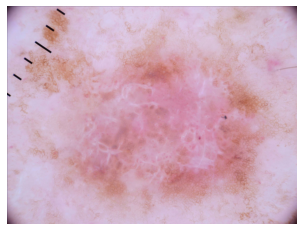

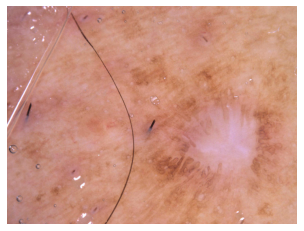

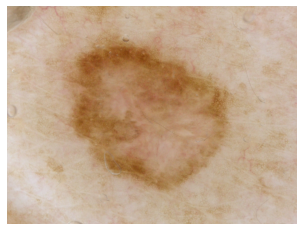

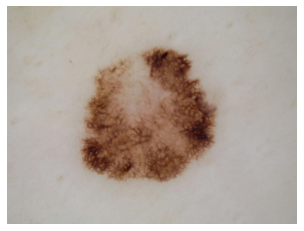

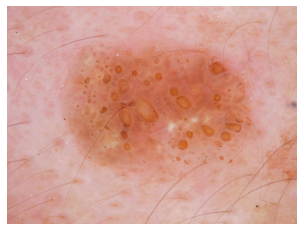

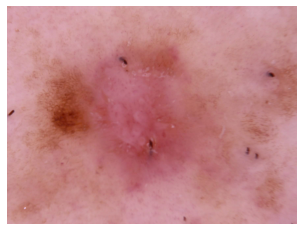

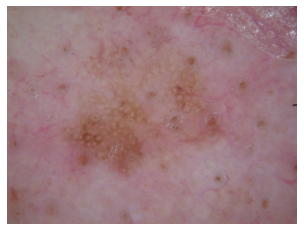

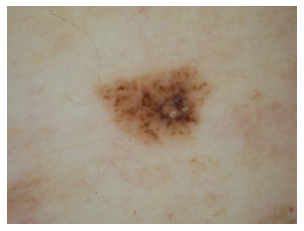

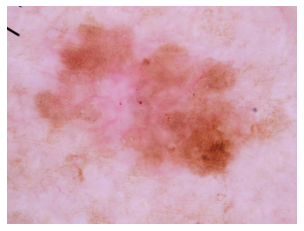

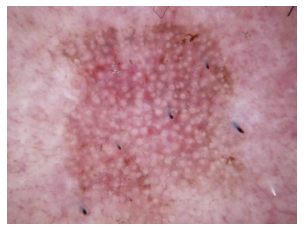

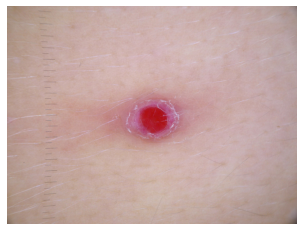

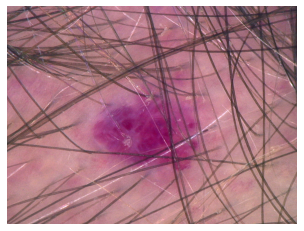

In [8]:
# Visualize the data
for i, img_path in enumerate(next_dermatofib+next_melanoma+next_pigmented_keratosis+next_seborrheic+next_squamous+next_vascular):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

#Data Augmentation

In [9]:
# Import libraries for preprocessing
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [10]:
# Rescale the dataset
TRAINING_DIR = "/tmp/skin_d/"
training_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

VALIDATION_DIR = "/tmp/skin-test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Flow training images in batches of 16 using train_datagen generator
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR, # directory of the training dataset
	target_size=(150, 150),
	class_mode='categorical', # as we're working on multiclass dataset
  batch_size=16)

# Flow validation images in batches of 16 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR, # directory of the validation dataset
	target_size=(150, 150),
	class_mode='categorical', # as we're working on multiclass dataset
  batch_size=16)

Found 1392 images belonging to 6 classes.
Found 70 images belonging to 6 classes.


In [12]:
# Obtain the index for each class
print(validation_generator.class_indices)

{'dermatofibroma': 0, 'melanoma': 1, 'pigmented_benign_keratosis': 2, 'seborrheic_keratosis': 3, 'squamous_cell_carcinoma': 4, 'vascular_lesion': 5}


In [13]:
# Import libraries for preprocessing
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

# Perform data augmentation
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(height_factor=1, width_factor=None, fill_mode='reflect',
    interpolation='bilinear')
])

In [ ]:
# MASIH ERROR
# Data Augmentation Exploration

import numpy as np
from google.colab import files
from keras.preprocessing import image

pics = files.upload()

rotated = tf.image.rot90(pics)
visualize(pics, rotated)

cropped = tf.image.central_crop(pics, central_fraction=0.5)
visualize(pics,cropped)

bright = tf.image.adjust_brightness(pics, 0.4)
visualize(pics, bright)

saturated = tf.image.adjust_saturation(pics, 3)
visualize(pics, saturated)

grayscaled = tf.image.rgb_to_grayscale(pics)
visualize(pics, tf.squeeze(grayscaled))
_ = plt.colorbar()

flipped = tf.image.flip_left_right(pics)
visualize(pics, flipped)

def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

Saving ISIC_0001114.jpg to ISIC_0001114.jpg


ValueError: ignored

TypeError: ignored

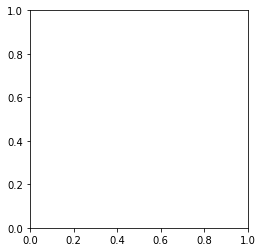

In [ ]:
#MASIH ERROR
images, label = next(iter(train_generator))
_ = plt.imshow(images)
_ = plt.title(get_label_name(label))

# Visualize before-after applying data augmentation
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

Found 1392 files belonging to 6 classes.
Using 1114 files for training.
Found 70 files belonging to 6 classes.
Using 14 files for validation.


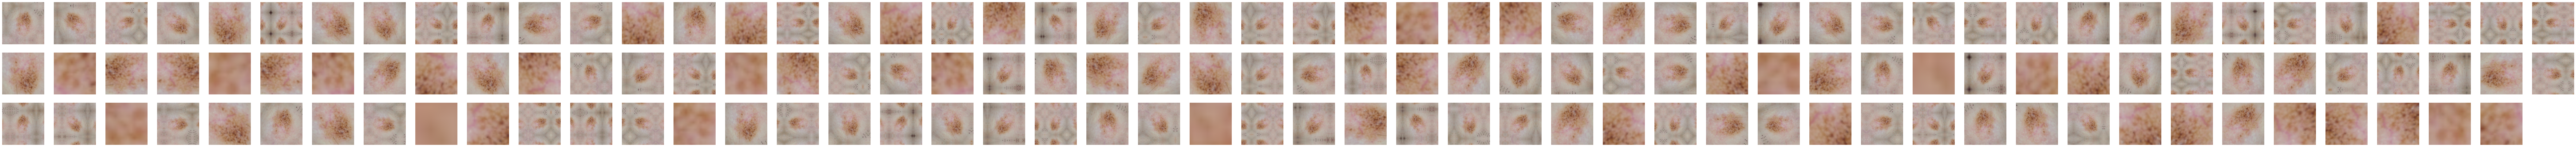

In [14]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAINING_DIR,
    validation_split=0.2,
    subset="training",
    seed=1392,
    image_size=(150, 150),
    batch_size=50
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    VALIDATION_DIR,
    validation_split=0.2,
    subset="validation",
    seed=70,
    image_size=(150,150),
    batch_size=5
)

plt.figure(figsize=(150, 150))
for images, _ in train_ds.take(1):
    for i in range(149):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(50, 50, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [15]:
# Post augmented
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR, # directory of the training dataset
	target_size=(150, 150),
	class_mode='categorical', # as we're working on multiclass daaset
  batch_size=5
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR, # directory of the validation dataset
	target_size=(150, 150),
	class_mode='categorical', # as we're working on multiclass daaset
  batch_size=1
)

Found 1392 images belonging to 6 classes.
Found 70 images belonging to 6 classes.


# **Model Training**
###**Model Building**
At this stage, we're building a keras model for image classification that consists of 4 convolutional layer and 512 hidden layers.


In [16]:
# Building the model
model = tf.keras.models.Sequential([
    # Make the prepocessing layer using data augmentation as a part of the model                                
    data_augmentation,
    
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    # 512 neuron hidden layers
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

After defining the model, generating the summary of the model would be a good thing to do.

In [ ]:
model.summary()

#Model Fitting
After building the model, we could start training to evaluate the model.

In [ ]:
# ada 3 model fit
# yg pertama akurasi trainingnya 68%, validasi accurationnya 40%, dibanding yg no 2 lebih stable nilai validasinya dan loss traininya lumayan gede
# yg ke 2, akurasi trainingnya 87% tapi validasinya cuma 55%, loss trainingnya kecil tapi loss validationnya gede
# yg ke 3, akurasi trainingnya start di 68% mentoknya 71% dan validasinya relatif stable antara 45-50an

In [17]:
# Ini seharusnya yg pake augmenattion, nanti kuraphin lagi,
# nanti kucek lagi apakah augmetasinya udah ke apply di sini apa belum
# FIRST ATTEMPT (with augmentation)
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

training_model = model.fit(train_generator,
                           epochs=25,
                           validation_data=validation_generator)

Epoch 1/25
279/279 [==============================] - 110s 388ms/step - loss: 1.4061 - accuracy: 0.4741 - val_loss: 2.0244 - val_accuracy: 0.3143
Epoch 2/25
279/279 [==============================] - 101s 362ms/step - loss: 1.1761 - accuracy: 0.5761 - val_loss: 1.8892 - val_accuracy: 0.3429
Epoch 3/25
279/279 [==============================] - 106s 379ms/step - loss: 1.1762 - accuracy: 0.5826 - val_loss: 2.0136 - val_accuracy: 0.3571
Epoch 4/25
279/279 [==============================] - 110s 395ms/step - loss: 1.0899 - accuracy: 0.6185 - val_loss: 2.2074 - val_accuracy: 0.3143
Epoch 5/25
279/279 [==============================] - 108s 388ms/step - loss: 1.0988 - accuracy: 0.6157 - val_loss: 2.1511 - val_accuracy: 0.3286
Epoch 6/25
279/279 [==============================] - 109s 389ms/step - loss: 1.0496 - accuracy: 0.6250 - val_loss: 1.9644 - val_accuracy: 0.3429
Epoch 7/25
279/279 [==============================] - 109s 390ms/step - loss: 1.0319 - accuracy: 0.6135 - val_loss: 2.1074 -

In [ ]:
# SECOND ATTEMPT (without augmentation)
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              epochs=25,
                              validation_data=validation_generator)

In [ ]:
# THIRD ATTEMPT (without augmentation)
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              epochs=25,
                              validation_data=validation_generator)

In [ ]:
# FOURTH ATTEMPT (with augmentation)
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              epochs=25,
                              validation_data=validation_generator)

In [ ]:
# FIFTH ATTEMPT (without augmentation)
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              epochs=25,
                              validation_data=validation_generator)

In [ ]:
# SIXTH ATTEMPT (Without Augmentation)
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              epochs=25,
                              validation_data=validation_generator)

In [ ]:
# 7th Attempt Without Augmentation
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              epochs=25,
                              validation_data=validation_generator)

In [ ]:
# 8th Attempt Without Augmentation
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              epochs=25,
                              validation_data=validation_generator)

In [ ]:
# 9th Without Augmentation
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              epochs=25,
                              validation_data=validation_generator)

In [ ]:
# 10th Attempt Without Augmentation
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              epochs=25,
                              validation_data=validation_generator)

In [ ]:
# 11th Attempt Without Augmentation
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              epochs=40,
                              validation_data=validation_generator)

In [ ]:
# 12th Without Augmentation
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              epochs=50,
                              validation_data=validation_generator)

In [ ]:
# Plot train and validation acc & loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
# without augmentation accuracy plot
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.fit(datagen.flow(x_train, y_train, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(x_train, y_train,
         batch_size=8, subset='validation'),
         steps_per_epoch=len(x_train) / 32, epochs=epochs)

### Visualize Training Result

To get a better understanding of how good the model is, let's visualize the accuracy and loss of training & validation.

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
# without augmentation accuracy plot
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##Predict

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
	# predicting images
	path = fn
	img = image.load_img(path, target_size=(150, 150))
	x = image.img_to_array(img)
	x = np.expand_dims(x, axis=0)

	images = np.vatack([x])
	classes = model.predict(images, bacth_size=10)
	print(fn)
	print(classes)

##Saved Trained Model

In [ ]:
# Saving model into .h5 (keras model) format
model.save("skin-disease.h5")

#==== Transfer Learning ====
### Reference: https://www.tensorflow.org/lite/tutorials/model_maker_image_classification

In [ ]:
#Install model maker
!pip install -q tflite-model-maker

     |████████████████████████████████| 593kB 8.7MB/s 
     |████████████████████████████████| 92kB 10.4MB/s 
     |████████████████████████████████| 6.3MB 16.8MB/s 
     |████████████████████████████████| 645kB 32.5MB/s 
     |████████████████████████████████| 122kB 48.9MB/s 
     |████████████████████████████████| 686kB 40.4MB/s 
     |████████████████████████████████| 1.1MB 38.3MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
     |████████████████████████████████| 174kB 55.0MB/s 
     |████████████████████████████████| 112kB 52.6MB/s 
     |████████████████████████████████| 1.2MB 35.5MB/s 
     |████████████████████████████████| 849kB 41.6MB/s 
     |████████████████████████████████| 194kB 55.0MB/s 
     |████████████████████████████████| 358kB 34.5MB/s 
     |████████████████████████████████| 102kB 13.0MB/s 
     |████████████████████████████████| 38.2MB 83kB/s 


In [ ]:
# Import Libraries
from tflite_model_maker import image_classifier
from tflite_model_maker.image_classifier import DataLoader

In [ ]:
local_zip = 'skin-disease.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
DATASET_DIR = "/tmp/skin_disease/"

####Step 1. Load input data. 
Use `DataLoader` class to load data. 
Split the data into training data (90%) and testing data (10%).

In [ ]:
data = DataLoader.from_folder(DATASET_DIR)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 1462, num_label: 6, labels: dermatofibroma, melanoma, pigmented_benign_keratosis, seborrheic_keratosis, squamous_cell_carcinoma, vascular_lesion.


INFO:tensorflow:Load image with size: 1462, num_label: 6, labels: dermatofibroma, melanoma, pigmented_benign_keratosis, seborrheic_keratosis, squamous_cell_carcinoma, vascular_lesion.


Show 25 image examples with label.

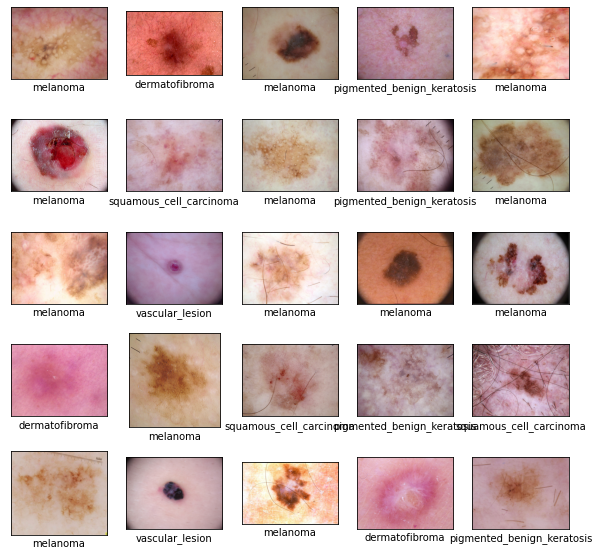

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

###Step 2: Customize the TensorFlow Model
Create a custom image classifier model based on the loaded data. The default model is EfficientNet-Lite0.

In [ ]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7686      
Total params: 3,420,710
Trainable params: 7,686
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


41/41 [==============================] - 81s 2s/step - loss: 1.4620 - accuracy: 0.4695
Epoch 2/5
41/41 [==============================] - 79s 2s/step - loss: 1.2202 - accuracy: 0.5892
Epoch 3/5
41/41 [==============================] - 79s 2s/step - loss: 1.1600 - accuracy: 0.6402
Epoch 4/5
41/41 [==============================] - 79s 2s/step - loss: 1.0986 - accuracy: 0.6730
Epoch 5/5
41/41 [==============================] - 79s 2s/step - loss: 1.0750 - accuracy: 0.6982


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7686      
Total params: 3,420,710
Trainable params: 7,686
Non-trainable params: 3,413,024
_________________________________________________________________


###Step 3: Evaluate the Customized Model
Evaluate the result of the model, get the loss and accuracy of the model.

In [ ]:
loss, accuracy = model.evaluate(test_data)

5/5 [==============================] - 18s 2s/step - loss: 0.9967 - accuracy: 0.7211


###Step 4: Export to TensorFlow Lite Model
Convert the trained model to TensorFlow Lite model format with metadata so that you can later use in an on-device ML application. The label file and the vocab file are embedded in metadata. The default TFLite filename is model.tflite.

In [ ]:
#export model
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmp3kkrj1h5/assets


INFO:tensorflow:Assets written to: /tmp/tmp3kkrj1h5/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp3_l1xqqs/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp3_l1xqqs/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [ ]:
#download tflite
from google.colab import files
files.download('model.tflite') 